In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time
from scipy import stats
import re

# Read in data

In [ ]:
# products = pd.read_csv('/content/drive/MyDrive/SocialNetworkAnalysis-2024Spring/Final Project/data/products_train.csv') # Sovann link
# sessions = pd.read_csv('/content/drive/MyDrive/SocialNetworkAnalysis-2024Spring/Final Project/data/sessions_train.csv') # Jiaying link
products = pd.read_csv("/content/drive/MyDrive/Social Network Analysis/data/products_train.csv") # Sovann link
sessions = pd.read_csv("/content/drive/MyDrive/Social Network Analysis/data/sessions_train.csv") # Sovann link

In [ ]:
products.head()

,id,locale,title,price,brand,color,size,model,material,author,desc
0,B005ZSSN10,DE,RED DRAGON Amberjack 3 - Steel Tip 22 Gramm Wo...,30.95,RED DRAGON,NaN,NaN,RDD0089,NaN,NaN,Amberjacks Steel Dartpfeile sind verfügbar in ...
1,B08PRYN6LD,DE,Simply Keto Lower Carb* Schokodrops ohne Zucke...,17.90,Simply Keto,NaN,750 g (1er Pack),NaN,NaN,NaN,🌱 NATÜRLICHE SÜSSE DURCH ERYTHRIT - Wir stelle...
2,B09MBZJ48V,DE,"Sennheiser 508377 PC 5.2 Chat, Stilvolles Mult...",68.89,Sennheiser,Multi-Colour,One size,508377,Kunstleder,NaN,3.5 MM BUCHSE - Kann problemlos an Geräte mit ...
3,B08ZN6F26S,DE,AmyBenton Auto ab 1 2 3 ahre - Baby Aufziehbar...,18.99,Amy & Benton,Animal Car,NaN,2008B,aufziehauto 1 jahr,NaN,【Auto aufziehbar】: Drücken Sie einfach leicht ...
4,B094DGRV7D,DE,PLAYMOBIL - 70522 - Cavaliere mit grauem Pony,7.17,PLAYMOBIL,Nicht Zutreffend.,OneSize,70522,Polypropylen,NaN,Inhalt: 1 Stück


In [ ]:
sessions.head()

,prev_items,next_item,locale
0,['B09W9FND7K' 'B09JSPLN1M'],B09M7GY217,DE
1,['B076THCGSG' 'B007MO8IME' 'B08MF65MLV' 'B001B...,B001B4THSA,DE
2,['B0B1LGXWDS' 'B00AZYORS2' 'B0B1LGXWDS' 'B00AZ...,B0767DTG2Q,DE
3,['B09XMTWDVT' 'B0B4MZZ8MB' 'B0B7HZ2GWX' 'B09XM...,B0B4R9NN4B,DE
4,['B09Y5CSL3T' 'B09Y5DPTXN' 'B09FKD61R8'],B0BGVBKWGZ,DE


# Data Cleaning-Products

## Drop author

In [ ]:
products = products.drop('author', axis=1)
products.head()

,id,locale,title,price,brand,color,size,model,material,desc
0,B005ZSSN10,DE,RED DRAGON Amberjack 3 - Steel Tip 22 Gramm Wo...,30.95,RED DRAGON,NaN,NaN,RDD0089,NaN,Amberjacks Steel Dartpfeile sind verfügbar in ...
1,B08PRYN6LD,DE,Simply Keto Lower Carb* Schokodrops ohne Zucke...,17.90,Simply Keto,NaN,750 g (1er Pack),NaN,NaN,🌱 NATÜRLICHE SÜSSE DURCH ERYTHRIT - Wir stelle...
2,B09MBZJ48V,DE,"Sennheiser 508377 PC 5.2 Chat, Stilvolles Mult...",68.89,Sennheiser,Multi-Colour,One size,508377,Kunstleder,3.5 MM BUCHSE - Kann problemlos an Geräte mit ...
3,B08ZN6F26S,DE,AmyBenton Auto ab 1 2 3 ahre - Baby Aufziehbar...,18.99,Amy & Benton,Animal Car,NaN,2008B,aufziehauto 1 jahr,【Auto aufziehbar】: Drücken Sie einfach leicht ...
4,B094DGRV7D,DE,PLAYMOBIL - 70522 - Cavaliere mit grauem Pony,7.17,PLAYMOBIL,Nicht Zutreffend.,OneSize,70522,Polypropylen,Inhalt: 1 Stück


In [ ]:
test = products.loc[products['locale']=='UK'].drop('locale',axis=1)
test = test.loc[test['price'] < 500]
np.sum(test.isnull(), axis=0)

id               0
title            0
price            0
brand         3609
color       113439
size        187673
model       242527
material    188553
desc         36274
dtype: int64

In [ ]:
len(test)

473662

## Filter UK

In [ ]:
products_uk = products.loc[products['locale']=='UK'].drop('locale',axis=1)
products_uk.head()

,id,title,price,brand,color,size,model,material,desc
913336,B087LZNPHS,"SOCHOW Sherpa Fleece Throw Blanket, Double-Sid...",24.99,SOCHOW,Teal Green,127cm×150cm,NaN,100% Polyester,COLOR: The sherpa throw blanket is available i...
913337,B08THFN1KX,Hippowarehouse Personalised Photo Printed Mous...,9.95,Hippowarehouse,White,240mm x 190mm x 60mm,50245-Mat-Perso,Rubber,Competitively priced
913338,0804185328,"500 Easy Recipes for Every Machine, Both Stove...",16.49,Clarkson Potter,White,NaN,NaN,NaN,NaN
913339,B09VBKDBW6,"TYHJOY Mini Bag Sealer, Handheld Vacuum Heat S...",11.99,TYHJOY,Black,NaN,FBA-sealer-black,Acrylonitrile Butadiene Styrene,【AFTER-SALE】This handheld food heat sealer sho...
913340,B096ZW8B49,Lucosobie Steering Wheel Lock - Car Anti-Theft...,26.99,Lucosobie,Black,NaN,NaN,Alloy Steel,🔐【 Anti-Friction & Customer First】Each box of ...


In [ ]:
products_uk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500180 entries, 913336 to 1413515
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        500180 non-null  object 
 1   title     500180 non-null  object 
 2   price     500180 non-null  float64
 3   brand     495898 non-null  object 
 4   color     378078 non-null  object 
 5   size      301092 non-null  object 
 6   model     243528 non-null  object 
 7   material  298955 non-null  object 
 8   desc      460922 non-null  object 
dtypes: float64(1), object(8)
memory usage: 38.2+ MB


## Filter out 'crazy' price

In [ ]:
# max_price = max(products_uk['price'])
# num_max_price = len(products_uk[products_uk['price'] == max(products_uk['price'])])

# print(f'The max price for UK products: {max_price}')
# print(f'The number of products with this max price: {num_max_price}')

The max price for UK products: 40000000.07
The number of products with this max price: 25280


In [ ]:
products_uk = products_uk.loc[products_uk['price'] < 500]
products_uk.shape

(473662, 9)

In [ ]:
products_uk.head()

,id,title,price,brand,color,size,model,material,desc
913336,B087LZNPHS,"SOCHOW Sherpa Fleece Throw Blanket, Double-Sid...",24.99,SOCHOW,Teal Green,127cm×150cm,NaN,100% Polyester,COLOR: The sherpa throw blanket is available i...
913337,B08THFN1KX,Hippowarehouse Personalised Photo Printed Mous...,9.95,Hippowarehouse,White,240mm x 190mm x 60mm,50245-Mat-Perso,Rubber,Competitively priced
913338,0804185328,"500 Easy Recipes for Every Machine, Both Stove...",16.49,Clarkson Potter,White,NaN,NaN,NaN,NaN
913339,B09VBKDBW6,"TYHJOY Mini Bag Sealer, Handheld Vacuum Heat S...",11.99,TYHJOY,Black,NaN,FBA-sealer-black,Acrylonitrile Butadiene Styrene,【AFTER-SALE】This handheld food heat sealer sho...
913340,B096ZW8B49,Lucosobie Steering Wheel Lock - Car Anti-Theft...,26.99,Lucosobie,Black,NaN,NaN,Alloy Steel,🔐【 Anti-Friction & Customer First】Each box of ...


In [ ]:
products_uk['price'].describe()

count    473662.000000
mean         20.881151
std          34.323867
min           0.000000
25%           7.520000
50%          12.950000
75%          20.990000
max         499.990000
Name: price, dtype: float64

In [ ]:
test = test.fillna('None') # NA?

In [ ]:
brand_counts = test["brand"].value_counts()

In [ ]:
common_brands = list(brand_counts[brand_counts >= 50].keys())

In [ ]:
len(common_brands)

1295

In [ ]:
temp = list(brand_counts)
sum([t for t in temp if t >= 50])

148297

In [ ]:
test["common_brand"] = [brand in common_brands for brand in test["brand"]]

In [ ]:
test_trimmed = test[test["common_brand"]]
test_trimmed

,id,title,price,brand,color,size,model,material,desc,common_brand
913343,B07SZHKGZJ,"Spigen Rugged Armor, Designed for iPhone 11 Ca...",11.99,Spigen,Black,6.1 inch,076CS27183,Thermoplastic Polyurethane,Air Cushion Technology for shock absorption,True
913344,B073LXQ7LJ,"Criacr Motion Sensor Light Bar, (10 LED, 6 Pac...",36.99,Criacr,White,6 Packs,UF14_6PCS-UK Motion Sensing Light,Acrylonitrile Butadiene Styrene,10 LED & SUPER BRIGHT: With 10 LED in each lig...,True
913345,B0B1DW1GH1,"Coolzon Bento Box Lunch Box Adults Kids,1400ML...",12.99,Coolzon,Blue,None,None,Plastic,After-sale Service- If you have any product qu...,True
913361,B089X4XCLB,Marvel’s Spider-Man: Miles Morales – PlayStati...,36.85,PlayStation,Black,None,9835929,None,Adaptive Triggers: Feel Spider-Man’s webs on y...,True
913363,B08P1J79P6,"DEXI Dirt Trapper Door Mat,Non-slip Barrier Ma...",24.99,DAILYMAT,Blue Mixed Black,60 x 90 cm,None,Microfibre,CUSTOMER CARE:We promise to take customer sati...,True
...,...,...,...,...,...,...,...,...,...,...
1413501,B0BF5555Q3,7.8inch Silicone Air Fryer Liners Reusable Air...,8.99,Dzpuhuojz,2 X Black,7.8inch,None,Silicone,🍔【Easy to Clean & Dishwasher Safe 】- Use our a...,True
1413504,B084R1YXKQ,Lindt EXCELLENCE Dark 90% Intense Cacao Vegan ...,1.60,Lindt,None,100 g (Pack of 1),83570,plastic,None,True
1413505,B07ZBH5Q5C,"Core Balance Yoga Mat, TPE Gymnastics Mat, Tra...",23.99,Core Balance,Lilac Blush,None,None,Foam,DOUBLE-SIDED NON-SLIP TEXTURED FINISH: We’ve d...,True
1413508,B09VCZ4G6S,Yaheetech Metal Bird Cage with Open Play Top T...,29.99,Yaheetech,Teal Blue,None,None,Iron,Boing rope included: This bird cage comes with...,True


# Feature Engineering-Products

## Combine all text features into one

In [ ]:
products_uk = products_uk.fillna('None') # NA?

In [ ]:
products_uk.head()

,id,title,price,brand,color,size,model,material,desc
913336,B087LZNPHS,"SOCHOW Sherpa Fleece Throw Blanket, Double-Sid...",24.99,SOCHOW,Teal Green,127cm×150cm,None,100% Polyester,COLOR: The sherpa throw blanket is available i...
913337,B08THFN1KX,Hippowarehouse Personalised Photo Printed Mous...,9.95,Hippowarehouse,White,240mm x 190mm x 60mm,50245-Mat-Perso,Rubber,Competitively priced
913338,0804185328,"500 Easy Recipes for Every Machine, Both Stove...",16.49,Clarkson Potter,White,None,None,None,None
913339,B09VBKDBW6,"TYHJOY Mini Bag Sealer, Handheld Vacuum Heat S...",11.99,TYHJOY,Black,None,FBA-sealer-black,Acrylonitrile Butadiene Styrene,【AFTER-SALE】This handheld food heat sealer sho...
913340,B096ZW8B49,Lucosobie Steering Wheel Lock - Car Anti-Theft...,26.99,Lucosobie,Black,None,None,Alloy Steel,🔐【 Anti-Friction & Customer First】Each box of ...


In [ ]:
products_uk['full_desc'] = 'title:'+products_uk['title']+ "\n" + \
                    'brand:'+products_uk['brand']+ "\n" + \
                    'color:'+products_uk['color']+ "\n" + \
                    'size:'+products_uk['size']+ "\n" + \
                    'model:'+products_uk['model']+ "\n" + \
                    'material:'+products_uk['material']+ "\n" + \
                    'desc:'+products_uk['desc']

In [ ]:
products_uk.head()

,id,title,price,brand,color,size,model,material,desc,full_desc
913336,B087LZNPHS,"SOCHOW Sherpa Fleece Throw Blanket, Double-Sid...",24.99,SOCHOW,Teal Green,127cm×150cm,None,100% Polyester,COLOR: The sherpa throw blanket is available i...,"title:SOCHOW Sherpa Fleece Throw Blanket, Doub..."
913337,B08THFN1KX,Hippowarehouse Personalised Photo Printed Mous...,9.95,Hippowarehouse,White,240mm x 190mm x 60mm,50245-Mat-Perso,Rubber,Competitively priced,title:Hippowarehouse Personalised Photo Printe...
913338,0804185328,"500 Easy Recipes for Every Machine, Both Stove...",16.49,Clarkson Potter,White,None,None,None,None,"title:500 Easy Recipes for Every Machine, Both..."
913339,B09VBKDBW6,"TYHJOY Mini Bag Sealer, Handheld Vacuum Heat S...",11.99,TYHJOY,Black,None,FBA-sealer-black,Acrylonitrile Butadiene Styrene,【AFTER-SALE】This handheld food heat sealer sho...,"title:TYHJOY Mini Bag Sealer, Handheld Vacuum ..."
913340,B096ZW8B49,Lucosobie Steering Wheel Lock - Car Anti-Theft...,26.99,Lucosobie,Black,None,None,Alloy Steel,🔐【 Anti-Friction & Customer First】Each box of ...,title:Lucosobie Steering Wheel Lock - Car Anti...


In [ ]:
final_products_uk = products_uk.drop(['title','brand','color','size','model','material','desc'],axis=1)
final_products_uk.head()

,id,price,full_desc
913336,B087LZNPHS,24.99,"title:SOCHOW Sherpa Fleece Throw Blanket, Doub..."
913337,B08THFN1KX,9.95,title:Hippowarehouse Personalised Photo Printe...
913338,0804185328,16.49,"title:500 Easy Recipes for Every Machine, Both..."
913339,B09VBKDBW6,11.99,"title:TYHJOY Mini Bag Sealer, Handheld Vacuum ..."
913340,B096ZW8B49,26.99,title:Lucosobie Steering Wheel Lock - Car Anti...


In [ ]:
print(final_products_uk.iloc[0,2])

title:SOCHOW Sherpa Fleece Throw Blanket, Double-Sided Super Soft Luxurious Plush Blanket 127cm×150cm, Teal Green
brand:SOCHOW
color:Teal Green
size:127cm×150cm
model:None
material:100% Polyester
desc:COLOR: The sherpa throw blanket is available in a variety of colors, being able to meet your individual requirements. With different colors to choose from, you will easily find the suitable throw blanket to coordinate with your decor.


In [ ]:
# Save it as csv
#final_products_uk.to_csv('/content/drive/MyDrive/SocialNetworkAnalysis-2024Spring/Final Project/data/final_products_uk.csv', index=False)

# Data Cleaning-Sessions

## Filter UK

In [ ]:
sessions_uk = sessions.loc[sessions['locale']=='UK']
sessions_uk.head()

,prev_items,next_item,locale
2090535,['B0BFDL54Y7' 'B0BFDR9X13' 'B07J4WF8VH' 'B07Y2...,B07Y227WNJ,UK
2090536,['B07FM2GLNQ' 'B07GZW3P4W'],B095NNZCR6,UK
2090537,['B0021L95HU' 'B07DDL77RY' 'B07DDL77RY'],B002KA1FZC,UK
2090538,['B0B2WSZYL2' 'B000I8XZ7O'],B000I90TAO,UK
2090539,['B00LW1APOC' 'B00LW1APOC' 'B00OI6NQUI' 'B09HL...,B07H54NZ3K,UK


In [ ]:
sessions_uk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1182181 entries, 2090535 to 3272715
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   prev_items  1182181 non-null  object
 1   next_item   1182181 non-null  object
 2   locale      1182181 non-null  object
dtypes: object(3)
memory usage: 36.1+ MB


## Seperate prev_items

In [ ]:
prev_items_sep = list(map(lambda row: [i.replace("'", "") for i in row.strip('[]').split()], sessions_uk['prev_items']))
sessions_uk['prev_items_sep'] = prev_items_sep
sessions_uk.head()

<ipython-input-164-ca125790ead5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sessions_uk['prev_items_sep'] = prev_items_sep


,prev_items,next_item,locale,prev_items_sep
2090535,['B0BFDL54Y7' 'B0BFDR9X13' 'B07J4WF8VH' 'B07Y2...,B07Y227WNJ,UK,"[B0BFDL54Y7, B0BFDR9X13, B07J4WF8VH, B07Y21LDJX]"
2090536,['B07FM2GLNQ' 'B07GZW3P4W'],B095NNZCR6,UK,"[B07FM2GLNQ, B07GZW3P4W]"
2090537,['B0021L95HU' 'B07DDL77RY' 'B07DDL77RY'],B002KA1FZC,UK,"[B0021L95HU, B07DDL77RY, B07DDL77RY]"
2090538,['B0B2WSZYL2' 'B000I8XZ7O'],B000I90TAO,UK,"[B0B2WSZYL2, B000I8XZ7O]"
2090539,['B00LW1APOC' 'B00LW1APOC' 'B00OI6NQUI' 'B09HL...,B07H54NZ3K,UK,"[B00LW1APOC, B00LW1APOC, B00OI6NQUI, B09HLDN8W1]"


In [ ]:
sessions_uk_new = sessions_uk.reset_index()[['prev_items_sep','next_item']]
sessions_uk_new.head()

,prev_items_sep,next_item
0,"[B0BFDL54Y7, B0BFDR9X13, B07J4WF8VH, B07Y21LDJX]",B07Y227WNJ
1,"[B07FM2GLNQ, B07GZW3P4W]",B095NNZCR6
2,"[B0021L95HU, B07DDL77RY, B07DDL77RY]",B002KA1FZC
3,"[B0B2WSZYL2, B000I8XZ7O]",B000I90TAO
4,"[B00LW1APOC, B00LW1APOC, B00OI6NQUI, B09HLDN8W1]",B07H54NZ3K


In [ ]:
sessions_uk_new.iloc[0,0]

['B0BFDL54Y7', 'B0BFDR9X13', 'B07J4WF8VH', 'B07Y21LDJX']

# Feature Engineering-Sessions

In [ ]:
def trim_list(l, valid_products):
    i = -1
    while abs(i) < len(l) and l[i] in valid_products:
        i -= 1
    i += 1

    if i == 0:
        return []
    else:
        return l[i:]


In [ ]:
test_sessions = sessions_uk_new[sessions_uk_new["prev_items_len"] > 2]

In [ ]:
valid_products = list(test_trimmed.id.values)
len(valid_products)

148297

In [ ]:
len(test_sessions)

732861

In [ ]:
test_sessions["valid"] = [item in valid_products for item in test_sessions["next_item"]]

<ipython-input-174-723909bf0f90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_sessions["valid"] = [item in valid_products for item in test_sessions["next_item"]]


In [ ]:
test_sessions

,prev_items_sep,next_item,prev_items_len,valid
0,"[B0BFDL54Y7, B0BFDR9X13, B07J4WF8VH, B07Y21LDJX]",B07Y227WNJ,4,False
2,"[B0021L95HU, B07DDL77RY, B07DDL77RY]",B002KA1FZC,3,False
4,"[B00LW1APOC, B00LW1APOC, B00OI6NQUI, B09HLDN8W1]",B07H54NZ3K,4,True
5,"[B079DXT1JM, B079DZRVDF, B079FD3MGB]",B09PKCR4CX,3,False
6,"[B09X37JZ54, B0B9GH9597, B0B9GHMSXS, B074PQTR4W]",B01K1SETD4,4,False
...,...,...,...,...
1182172,"[B00757W4KK, B08JQK32PW, B08JQK32PW, B0819XVK9...",B00XVOQZ0G,7,True
1182174,"[B07H7SRVZD, B07T9KMPX7, B07H7SRVZD, B07T9KMPX...",B07TCCM2YC,5,False
1182175,"[B07SNY83RR, B08BX8BHK1, B08Z84L4Y9]",B09YYWYX9B,3,False
1182176,"[B06XK89969, B01NGT5NF4, B00D5Z89C8, B07ZVGCHR...",B07VL2W1DR,8,False


In [ ]:
#test_sessions.to_csv("/content/drive/MyDrive/SocialNetworkAnalysis-2024Spring/Final Project/data/sessions_valid.csv", index=False)

In [ ]:
# Load the Drive helper
from google.colab import drive

# Below will prompt for authorization but it will make your google drive available (i.e., mount your drive).
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# pd.read_csv("/content/drive/MyDrive/SocialNetworkAnalysis-2024Spring/Final Project/data/sessions_valid.csv") # Jiaying path
sessions_valid = pd.read_csv("/content/drive/MyDrive/Social Network Analysis/data/sessions_valid.csv") # Sovann path
sessions_valid

,prev_items_sep,next_item,prev_items_len,valid
0,"['B0BFDL54Y7', 'B0BFDR9X13', 'B07J4WF8VH', 'B0...",B07Y227WNJ,4,False
1,"['B0021L95HU', 'B07DDL77RY', 'B07DDL77RY']",B002KA1FZC,3,False
2,"['B00LW1APOC', 'B00LW1APOC', 'B00OI6NQUI', 'B0...",B07H54NZ3K,4,True
3,"['B079DXT1JM', 'B079DZRVDF', 'B079FD3MGB']",B09PKCR4CX,3,False
4,"['B09X37JZ54', 'B0B9GH9597', 'B0B9GHMSXS', 'B0...",B01K1SETD4,4,False
...,...,...,...,...
732856,"['B00757W4KK', 'B08JQK32PW', 'B08JQK32PW', 'B0...",B00XVOQZ0G,7,True
732857,"['B07H7SRVZD', 'B07T9KMPX7', 'B07H7SRVZD', 'B0...",B07TCCM2YC,5,False
732858,"['B07SNY83RR', 'B08BX8BHK1', 'B08Z84L4Y9']",B09YYWYX9B,3,False
732859,"['B06XK89969', 'B01NGT5NF4', 'B00D5Z89C8', 'B0...",B07VL2W1DR,8,False


Convert prev_items_sep from string to list

In [ ]:
from ast import literal_eval

In [ ]:
sessions_valid["prev_items_sep"] = sessions_valid["prev_items_sep"].apply(literal_eval)
sessions_valid

,prev_items_sep,next_item,prev_items_len,valid
0,"[B0BFDL54Y7, B0BFDR9X13, B07J4WF8VH, B07Y21LDJX]",B07Y227WNJ,4,False
1,"[B0021L95HU, B07DDL77RY, B07DDL77RY]",B002KA1FZC,3,False
2,"[B00LW1APOC, B00LW1APOC, B00OI6NQUI, B09HLDN8W1]",B07H54NZ3K,4,True
3,"[B079DXT1JM, B079DZRVDF, B079FD3MGB]",B09PKCR4CX,3,False
4,"[B09X37JZ54, B0B9GH9597, B0B9GHMSXS, B074PQTR4W]",B01K1SETD4,4,False
...,...,...,...,...
732856,"[B00757W4KK, B08JQK32PW, B08JQK32PW, B0819XVK9...",B00XVOQZ0G,7,True
732857,"[B07H7SRVZD, B07T9KMPX7, B07H7SRVZD, B07T9KMPX...",B07TCCM2YC,5,False
732858,"[B07SNY83RR, B08BX8BHK1, B08Z84L4Y9]",B09YYWYX9B,3,False
732859,"[B06XK89969, B01NGT5NF4, B00D5Z89C8, B07ZVGCHR...",B07VL2W1DR,8,False


To avoid any cell running for too long, define function and split up the list trimming

In [ ]:
def trim_df(df, valid_products, start_index, end_index):
  for i in range(start_index, end_index+1):
    df.at[i, "prev_items_sep"] = trim_list(df.loc[i, "prev_items_sep"], valid_products)

In [ ]:
trim_df(sessions_valid, valid_products, 0, 10000)

In [ ]:
blank_lists = 0
for i in range(10000):
  if not sessions_valid.loc[i, "prev_items_sep"]:
    blank_lists += 1

blank_lists

6218

About 62% blank after this, projected to turn 732k sessions into around 290k sessions

In [ ]:
trim_df(sessions_valid, valid_products, 10001, 100000)

In [ ]:
trim_df(sessions_valid, valid_products, 100001, 400000)

In [ ]:
trim_df(sessions_valid, valid_products, 400001, len(sessions_valid)-1)

In [ ]:
blank_lists = 0
for i in range(len(sessions_valid)):
  if not sessions_valid.loc[i, "prev_items_sep"]:
    blank_lists += 1

blank_lists

456710

In [ ]:
len(sessions_valid) - blank_lists

276151

We're left with 276,151 sessions as training

Rerunning prev_items_len code

In [ ]:
prev_len_trimmed = list(map(lambda row: len(row), sessions_valid['prev_items_sep']))
sessions_valid['prev_items_len'] = prev_len_trimmed
sessions_valid

,prev_items_sep,next_item,prev_items_len,valid
0,[],B07Y227WNJ,0,False
1,[],B002KA1FZC,0,False
2,"[B00LW1APOC, B00OI6NQUI, B09HLDN8W1]",B07H54NZ3K,3,True
3,"[B079DZRVDF, B079FD3MGB]",B09PKCR4CX,2,False
4,[],B01K1SETD4,0,False
...,...,...,...,...
732856,[],B00XVOQZ0G,0,True
732857,[],B07TCCM2YC,0,False
732858,[],B09YYWYX9B,0,False
732859,[],B07VL2W1DR,0,False


In [ ]:
sessions_valid_trimmed = sessions_valid[sessions_valid["prev_items_len"] > 0].reset_index()
sessions_valid_trimmed

,index,prev_items_sep,next_item,prev_items_len,valid
0,2,"[B00LW1APOC, B00OI6NQUI, B09HLDN8W1]",B07H54NZ3K,3,True
1,3,"[B079DZRVDF, B079FD3MGB]",B09PKCR4CX,2,False
2,7,[B00D8CXYXC],B01MYGEMXU,1,True
3,10,"[B07BR8JQWC, B07BR8JQWC, B002GJFLQ6]",B002I4DJOA,3,True
4,11,"[B08DM17RDG, B08DM1BC3F, B09Q6KCGC4, B09Q73K99...",B0849WB17J,5,False
...,...,...,...,...,...
276146,732845,"[B06Y5YQMHZ, B0036162JI, B0036162JI, B0001P0GD...",B09WDQ2C89,5,True
276147,732848,[B089DGVVXQ],B086435TB4,1,False
276148,732850,"[B07YHFC7B1, B07YHLL8T7, B07YHFC7B1, B0B58WWP9...",B09YR7BP3R,11,False
276149,732853,"[B07L9SJ214, B08M4G1QFS, B07L9SJ214, B07L9SNMDR]",B07L9N986G,4,True


Writing to csv to avoid needing to rerun code

In [ ]:
sessions_valid_trimmed.to_csv("/content/drive/MyDrive/Social Network Analysis/data/sessions_valid_trimmed.csv") # Sovann path

In [ ]:
sum(sessions_valid_trimmed["valid"])

182664

We'll have 182,664 sessions to train the model on

## Create column prev_items_len

Previous item list length

In [ ]:
str(trim_list(sessions_valid.loc[0, "prev_items_sep"], valid_products))

'[]'

In [ ]:
prev_len = list(map(lambda row: len(row), sessions_uk_new['prev_items_sep']))
sessions_uk_new['prev_items_len'] = prev_len
sessions_uk_new.head()

,prev_items_sep,next_item,prev_items_len
0,"[B0BFDL54Y7, B0BFDR9X13, B07J4WF8VH, B07Y21LDJX]",B07Y227WNJ,4
1,"[B07FM2GLNQ, B07GZW3P4W]",B095NNZCR6,2
2,"[B0021L95HU, B07DDL77RY, B07DDL77RY]",B002KA1FZC,3
3,"[B0B2WSZYL2, B000I8XZ7O]",B000I90TAO,2
4,"[B00LW1APOC, B00LW1APOC, B00OI6NQUI, B09HLDN8W1]",B07H54NZ3K,4


In [ ]:
#sessions_uk_new.to_csv('/content/drive/MyDrive/SocialNetworkAnalysis-2024Spring/Final Project/data/sessions_uk_withPrevItemLength.csv', index=False)

In [ ]:
prev_items_counts = sessions_uk_new['prev_items_len'].value_counts()
prev_items_counts

# We might want to think about:
# 1. whether the sessions that has really long prev_items are worth to consider
#    If we want to plot them, the graph will be really 'long' if we consider one
#    session as a whole.
#    If we only consider the previous item and the next item, this will not be a
#    a problem.

prev_items_len
2     449320
3     248849
4     152794
5      97431
6      65199
       ...  
95         1
88         1
75         1
77         1
66         1
Name: count, Length: 79, dtype: int64

## Keep last five items in a session

In [ ]:
prev5 = []

for i in range(len(sessions_uk_new)):
    if sessions_uk_new.loc[i, 'prev_items_len'] > 5:
        prev5.append(sessions_uk_new.loc[i, 'prev_items_sep'][-5:])
    else:
        lis = []
        for _ in range(5-sessions_uk_new.loc[i, 'prev_items_len']):
            lis.append("0")
        lis.extend(sessions_uk_new.loc[i, 'prev_items_sep'])
        prev5.append(lis)

In [ ]:
prev5[0]

['0', 'B0BFDL54Y7', 'B0BFDR9X13', 'B07J4WF8VH', 'B07Y21LDJX']

In [ ]:
prev5[13]

['B07XLTQQJN', 'B07XVP3R4F', 'B07BR8JQWC', 'B07BR8JQWC', 'B002GJFLQ6']

In [ ]:
final_sessions = sessions_uk_new[["next_item"]].copy()
final_sessions.head()

,next_item
0,B07Y227WNJ
1,B095NNZCR6
2,B002KA1FZC
3,B000I90TAO
4,B07H54NZ3K


In [ ]:
final_sessions['five_prev_items'] = prev5
final_sessions.head()

,next_item,five_prev_items
0,B07Y227WNJ,"[0, B0BFDL54Y7, B0BFDR9X13, B07J4WF8VH, B07Y21..."
1,B095NNZCR6,"[0, 0, 0, B07FM2GLNQ, B07GZW3P4W]"
2,B002KA1FZC,"[0, 0, B0021L95HU, B07DDL77RY, B07DDL77RY]"
3,B000I90TAO,"[0, 0, 0, B0B2WSZYL2, B000I8XZ7O]"
4,B07H54NZ3K,"[0, B00LW1APOC, B00LW1APOC, B00OI6NQUI, B09HLD..."


In [ ]:
final_sessions = final_sessions[['five_prev_items', 'next_item']]
final_sessions.head()

,five_prev_items,next_item
0,"[0, B0BFDL54Y7, B0BFDR9X13, B07J4WF8VH, B07Y21...",B07Y227WNJ
1,"[0, 0, 0, B07FM2GLNQ, B07GZW3P4W]",B095NNZCR6
2,"[0, 0, B0021L95HU, B07DDL77RY, B07DDL77RY]",B002KA1FZC
3,"[0, 0, 0, B0B2WSZYL2, B000I8XZ7O]",B000I90TAO
4,"[0, B00LW1APOC, B00LW1APOC, B00OI6NQUI, B09HLD...",B07H54NZ3K


In [ ]:
#final_sessions.to_csv('/content/drive/MyDrive/SocialNetworkAnalysis-2024Spring/Final Project/data/sessions_uk_withFivePrevItem.csv', index=False)

In [ ]:
final_sessions.iloc[16,0]

['B09GRZNR5S', 'B07MJHNH1R', 'B09GRZNR5S', 'B003ZGE1G0', 'B07KFXGKXW']

## Seperate prev_item into prev and next

In [ ]:
sessions_uk_new['prev_items_sep'][0]

['B0BFDL54Y7', 'B0BFDR9X13', 'B07J4WF8VH', 'B07Y21LDJX']

In [ ]:
sessions_uk_new.head()

,prev_items_sep,next_item
0,"[B0BFDL54Y7, B0BFDR9X13, B07J4WF8VH, B07Y21LDJX]",B07Y227WNJ
1,"[B07FM2GLNQ, B07GZW3P4W]",B095NNZCR6
2,"[B0021L95HU, B07DDL77RY, B07DDL77RY]",B002KA1FZC
3,"[B0B2WSZYL2, B000I8XZ7O]",B000I90TAO
4,"[B00LW1APOC, B00LW1APOC, B00OI6NQUI, B09HLDN8W1]",B07H54NZ3K


In [ ]:
sessions_uk_new.iloc[13,0]

['1509800697',
 '1509800662',
 'B07XLTQQJN',
 'B07XVP3R4F',
 'B07BR8JQWC',
 'B07BR8JQWC',
 'B002GJFLQ6']

In [ ]:
sessions_uk_new.head()

,prev_items_sep,next_item,prev_items_len
0,"[B0BFDL54Y7, B0BFDR9X13, B07J4WF8VH, B07Y21LDJX]",B07Y227WNJ,4
1,"[B07FM2GLNQ, B07GZW3P4W]",B095NNZCR6,2
2,"[B0021L95HU, B07DDL77RY, B07DDL77RY]",B002KA1FZC,3
3,"[B0B2WSZYL2, B000I8XZ7O]",B000I90TAO,2
4,"[B00LW1APOC, B00LW1APOC, B00OI6NQUI, B09HLDN8W1]",B07H54NZ3K,4


In [ ]:
# add next_item to prev_items_sep

def append_string_to_list(row):
    return row['prev_items_sep'] + [row['next_item']]

# Apply the function to each row using apply and axis=1
sessions_uk_new['all_items'] = sessions_uk_new.apply(append_string_to_list, axis=1)

In [ ]:
sessions_uk_new.head()

,prev_items_sep,next_item,prev_items_len,all_items
0,"[B0BFDL54Y7, B0BFDR9X13, B07J4WF8VH, B07Y21LDJX]",B07Y227WNJ,4,"[B0BFDL54Y7, B0BFDR9X13, B07J4WF8VH, B07Y21LDJ..."
1,"[B07FM2GLNQ, B07GZW3P4W]",B095NNZCR6,2,"[B07FM2GLNQ, B07GZW3P4W, B095NNZCR6]"
2,"[B0021L95HU, B07DDL77RY, B07DDL77RY]",B002KA1FZC,3,"[B0021L95HU, B07DDL77RY, B07DDL77RY, B002KA1FZC]"
3,"[B0B2WSZYL2, B000I8XZ7O]",B000I90TAO,2,"[B0B2WSZYL2, B000I8XZ7O, B000I90TAO]"
4,"[B00LW1APOC, B00LW1APOC, B00OI6NQUI, B09HLDN8W1]",B07H54NZ3K,4,"[B00LW1APOC, B00LW1APOC, B00OI6NQUI, B09HLDN8W..."


In [ ]:
sessions_uk_new['all_items'][0]

['B0BFDL54Y7', 'B0BFDR9X13', 'B07J4WF8VH', 'B07Y21LDJX', 'B07Y227WNJ']

In [ ]:
sessions_uk_new['all_items'][13]

['1509800697',
 '1509800662',
 'B07XLTQQJN',
 'B07XVP3R4F',
 'B07BR8JQWC',
 'B07BR8JQWC',
 'B002GJFLQ6',
 'B002I4DJOA']

In [ ]:
all_items_session = sessions_uk_new['all_items']

In [ ]:
all_items_session

0          [B0BFDL54Y7, B0BFDR9X13, B07J4WF8VH, B07Y21LDJ...
1                       [B07FM2GLNQ, B07GZW3P4W, B095NNZCR6]
2           [B0021L95HU, B07DDL77RY, B07DDL77RY, B002KA1FZC]
3                       [B0B2WSZYL2, B000I8XZ7O, B000I90TAO]
4          [B00LW1APOC, B00LW1APOC, B00OI6NQUI, B09HLDN8W...
                                 ...                        
1182176    [B06XK89969, B01NGT5NF4, B00D5Z89C8, B07ZVGCHR...
1182177    [B076M85W1K, B07L8792Q9, B095RW318L, B095RVVX9...
1182178                 [B00JQDIQRQ, B001O59QQE, B088M5YT6Y]
1182179                 [B07QMHMLJZ, B07FPYYMC4, B07PFF814D]
1182180                 [B06XC9TW57, B08WYQ4S11, B08WZ4CSRQ]
Name: all_items, Length: 1182181, dtype: object

In [ ]:
from itertools import chain

prev = list(chain.from_iterable(list(map(lambda p: [item for item in p[:-1]], all_items_session))))
prev[:5]

['B0BFDL54Y7', 'B0BFDR9X13', 'B07J4WF8VH', 'B07Y21LDJX', 'B07FM2GLNQ']

In [ ]:
next = list(chain.from_iterable(list(map(lambda p: [item for item in p[1:]], all_items_session))))
next[:5]

['B0BFDR9X13', 'B07J4WF8VH', 'B07Y21LDJX', 'B07Y227WNJ', 'B07GZW3P4W']

In [ ]:
pd.Series(prev, name='prev')

0          B0BFDL54Y7
1          B0BFDR9X13
2          B07J4WF8VH
3          B07Y21LDJX
4          B07FM2GLNQ
              ...    
4872501    B001O59QQE
4872502    B07QMHMLJZ
4872503    B07FPYYMC4
4872504    B06XC9TW57
4872505    B08WYQ4S11
Name: prev, Length: 4872506, dtype: object

In [ ]:
prev_product = pd.Series(prev, name='prev')
next_product = pd.Series(next, name='next')

In [ ]:
prev_next = {'prev':prev,'next':next}

In [ ]:
final_prev_next = pd.DataFrame(prev_next)
final_prev_next.head()

,prev,next
0,B0BFDL54Y7,B0BFDR9X13
1,B0BFDR9X13,B07J4WF8VH
2,B07J4WF8VH,B07Y21LDJX
3,B07Y21LDJX,B07Y227WNJ
4,B07FM2GLNQ,B07GZW3P4W


In [ ]:
#final_prev_next.to_csv("/content/drive/MyDrive/SocialNetworkAnalysis-2024Spring/Final Project/data/final_prev_next.csv", index=False)

In [ ]:
prev_next_edge = final_prev_next.groupby(['prev','next']).size().reset_index(name='weight')
prev_next_edge.head()

,prev,next,weight
0,0001821946,0008326045,2
1,000647988X,0007428545,2
2,000647988X,0007448031,1
3,000647988X,B005CB5HTG,1
4,000647988X,B016IPVNDS,1


In [ ]:
#prev_next_edge.to_csv("/content/drive/MyDrive/SocialNetworkAnalysis-2024Spring/Final Project/data/prev_next_edge_weight.csv", index=False)

In [ ]:
prev_next_edge["weight"].value_counts()

weight
1      2353913
2       249810
3        92861
4        47665
5        27938
        ...   
290          1
229          1
173          1
342          1
188          1
Name: count, Length: 281, dtype: int64

In [ ]:
len(prev_next_edge[prev_next_edge["weight"] <= 3])

2696584

In [ ]:
len(prev_next_edge[prev_next_edge["weight"] <= 5])

2772187

In [ ]:
prev_next_edge.shape

(2865257, 3)

In [ ]:
sum(prev_next_edge['weight'])

4872506

In [ ]:
final_prev_next.shape

(4872506, 2)

# DiGraph

In [ ]:
G = nx.DiGraph()

In [ ]:
for _, edge in prev_next_edge.iterrows():
    G.add_edge(edge['prev'], edge['next'], weight=edge['Count'])

In [ ]:
adj_mat = nx.adjacency_matrix(G)

# *Problem

If we already trained our model, when we predict, could we

# *Ideas

1. Baseline model 1: only use feature
2. Baseline model 2: only use graph
3. Next step model: simply concate feature & graph
4. Next step model: implement graph into feature
5. Next step model: implement feature into graph
6. Next step model: for each session

* pseudo-label: clustering => classification


In [ ]:
for item in item_list:
    G.add_node(item)

In [ ]:
# nx.draw(G)

In [ ]:
for i in range(len(final_session_pair)):
    for item1, item2 in final_session_pair:
        if G.has_edge(item1, item2):
            G[item1][item2]["weight"] += 1
        else:
            G.add_edge(item1, item2, weight=1)

KeyboardInterrupt: 

In [ ]:
# nx.draw(G)

# Code Dump

In [ ]:
# for i in range(50):#len(sessions_uk_new)):
#     print(sessions_uk_new.loc[i,"next_item"])
#     print(sessions_uk_new.loc[i,"all_items"])
#     if sessions_uk_new.loc[i,"next_item"] in sessions_uk_new.loc[i,"all_items"]:
#         print(i)

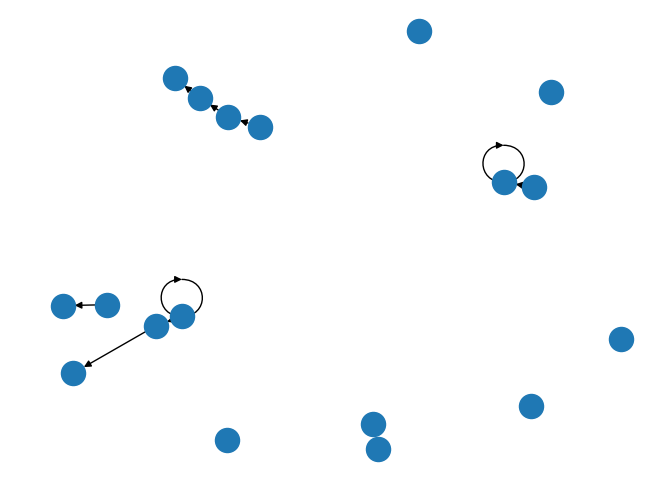

In [ ]:
nx.draw(G)

In [ ]:
# test = sessions_uk_new[0:5]
# test

# products = []
# for i in range(len(test)):
#     for item in test.loc[i, "all_items"]:
#         if item not in products:
#             products.append(item)
#     next = test.loc[i, "next_item"]
#     if next not in products:
#         products.append(next)

# products

# for item in products:
#     G.add_node(item)

# for i in range(len(test)):
#     for item1, item2 in test.loc[i, "prev_next_session"]:
#         if G.has_edge(item1, item2):
#             G[item1][item2]["weight"] += 1
#         else:
#             G.add_edge(item1, item2, weight=1)

# for i in test['prev_next_session']:
#     for j in i:
#         G.add_edge(i)